<a href="https://colab.research.google.com/github/Binisha1/spamDetection/blob/main/spamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   eg email spam
*   Bayes rule: p(Y|X) = P(X|Y)P(Y) / 𝞢 P(X|y)P(y)
*   decision rule: choose one that has greater probability
*   In Naive Bayes we assume all inputs are assumed to be independent
*   Class imbalance-confusion matrix  f1-score: harmonic mean of precision and recall
*   ROC curve: decision rule can be based on a threshold






dataset:  https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix,roc_curve,ConfusionMatrixDisplay
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')
  #encoding for invalid characters like emoji

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#drop unnecessary columns
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#renaming column
df.columns = ['labels','data']

In [7]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: >

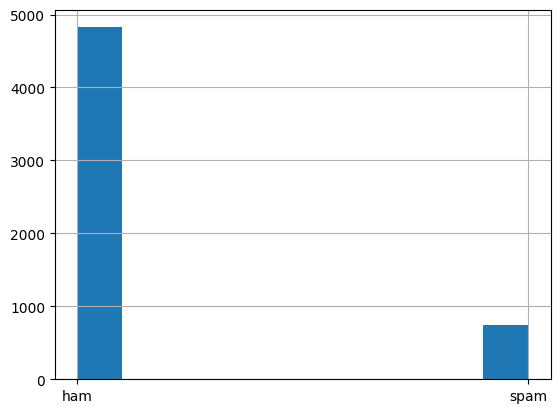

In [8]:
df['labels'].hist()

In [9]:
#create binary labels
df['b_labels'] = df['labels'].map({'ham':0,'spam':1})
Y = df['b_labels'].to_numpy()

In [10]:
#split up the data
df_train, df_test,Ytrain,Ytest = train_test_split(df['data'],Y,test_size = 0.33)

In [11]:
featurizer = CountVectorizer(stop_words='english',decode_error='ignore')
Xtrain = featurizer.fit_transform(df_train)
Xtest = featurizer.transform(df_test)

In [12]:
Xtrain

<3733x6816 sparse matrix of type '<class 'numpy.int64'>'
	with 29368 stored elements in Compressed Sparse Row format>

In [13]:
#create the model, train it, print scores
model = MultinomialNB()
model.fit(Xtrain,Ytrain)
print("train acc:",model.score(Xtrain,Ytrain))
print("test acc:", model.score(Xtest,Ytest))

train acc: 0.995713903027056
test acc: 0.9820554649265906


In [14]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
print("train F1: ", f1_score(Ytrain,Ptrain))
print("test F1: ", f1_score(Ytest,Ptest))

train F1:  0.9842519685039369
test F1:  0.9293361884368309


In [15]:
Prob_train = model.predict_proba(Xtrain)[:,1]
Prob_test = model.predict_proba(Xtest)[:,1]
print("train AUC: ", roc_auc_score(Ytrain,Prob_train))
print("test AUC: ", roc_auc_score(Ytest,Prob_test))

train AUC:  0.9974669567163248
test AUC:  0.9829398582447364


In [16]:
cm = confusion_matrix(Ytest,Ptest)
cm

array([[1589,   10],
       [  23,  217]])

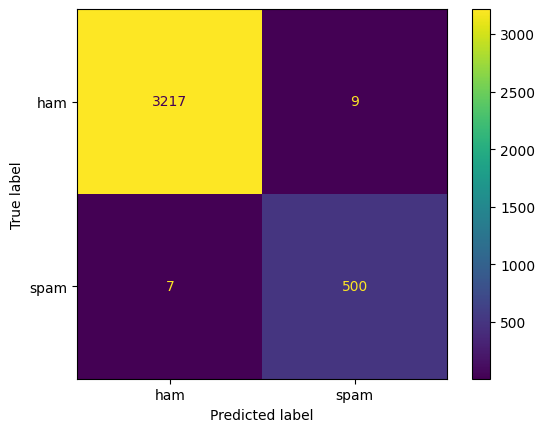

In [17]:
cm = confusion_matrix(Ytrain,Ptrain)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = ['ham','spam'])
disp.plot()

plt.show()

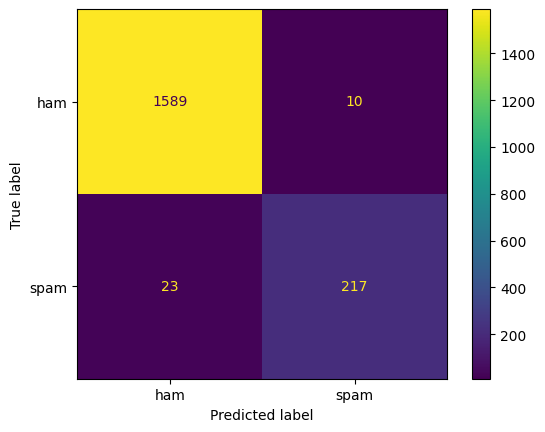

In [18]:
cm_test = confusion_matrix(Ytest,Ptest)
#plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,display_labels = ['ham','spam'])
disp.plot()

plt.show()

In [19]:
#visualize the data
def visualize(label):
  words = ''
  for msg in df[df['labels']==label]['data']:
    msg = msg.lower()
    words+=msg+' '
  wordcloud = WordCloud(width = 600,height = 400,random_state = 21,max_font_size = 110).generate(words)
  plt.figure(figsize = (10,7))
  plt.imshow(wordcloud,interpolation = 'bilinear')
  plt.axis('off')
  plt.show()


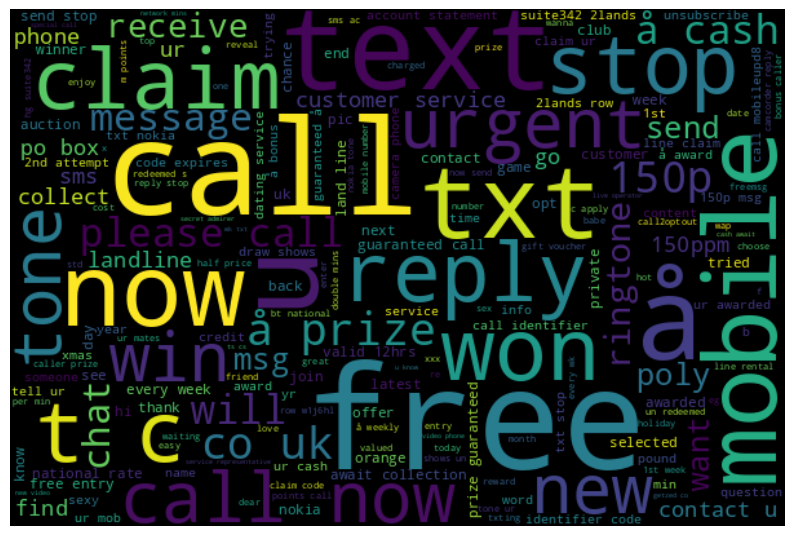

In [20]:
visualize('spam')

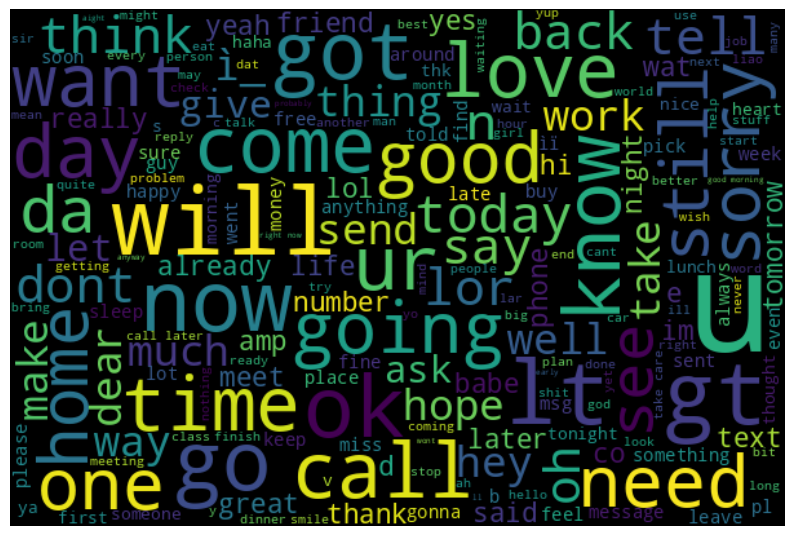

In [21]:
visualize('ham')

In [22]:
#see what we're getting wrong
X = featurizer.transform(df['data'])
df['predictions'] = model.predict(X)

In [23]:
#things that should be spam
sneaky_spam = df[(df['predictions']==0) & (df['b_labels']==1)]['data']
for msg in sneaky_spam:
  print(msg)


Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
SMS. ac sun0819 posts HELLO:\You seem cool
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
You have 1 new voicemail. Please call 08719181503
You have 1 new voicemail. Please call 08719181513.
For sale - arsenal dartboard. Good condition but no doubles or trebles!
More people are dogging in your area now. Call 09090204448 and join like minded guys. Why not arrange 1 yourself. There's 1 this evening. Aå£1.50 minAPN LS278BB
Hi ya babe x u 4goten bout me?' scammers getting smart..Though this is a regular vodafone no, if you respond you get further prem rate msg/subscription. Other nos used also. Beware!
Babe: U want me dont u baby! Im nasty and have a thing 4 filthyguys. Fancy a rude time with a sexy bitch. How about we go 

In [24]:
#things that should not be spam
not_actually_spam = df[(df['predictions']==1) & df['b_labels']==0]['data']
for msg in not_actually_spam:
  print(msg)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though
Even my brother is not like to speak with me. They treat me like aids patent.
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.
I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
I HAVE A DATE ON SUNDAY WITH WILL!!
Oh k...i'm watching here:)
Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet.
Fine if thatåÕs the way u feel. ThatåÕs the way its got